In [1]:
import matplotlib.pyplot as plt
from binary import img_to_binary

In [2]:
input_filepath = "../../../data/POM/imgs/crack.jpeg"

In [3]:
binary_img = img_to_binary(input_filepath, 90)

In [4]:
plt.rcParams["axes.labelsize"] = 25
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.titlepad"] = 25
plt.rcParams["axes.labelpad"] = 10
plt.rc("xtick.major", width=2, size=5, pad=10)
plt.rc("ytick.major", width=2, size=5, pad=10)
plt.rc("xtick", labelsize=15, direction="out")
plt.rc("ytick", labelsize=15, direction="out")

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/site-packages/matplotlib/pyplot.py'>

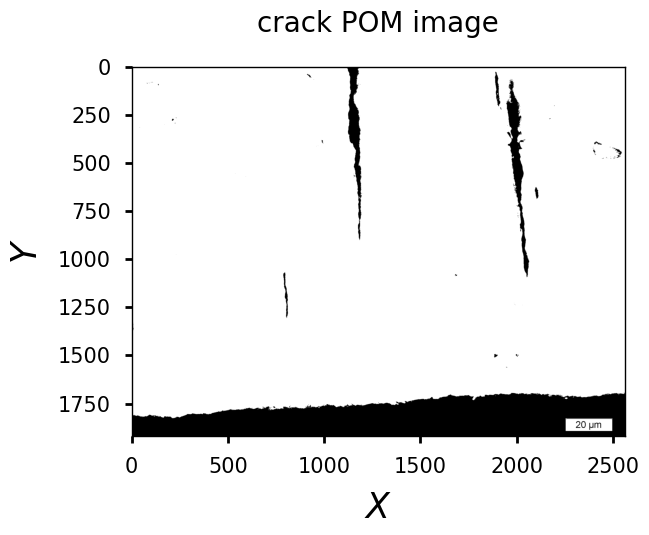

In [5]:
def binary_img_graph():
    fig, ax = plt.subplots()

    ax.imshow(binary_img, cmap="gray")
    ax.set_title("crack POM image")
    ax.set_xlabel("$X$")
    ax.set_ylabel("$Y$")
    ax.set_xlim(0, binary_img.shape[1])
    ax.set_ylim(binary_img.shape[0], 0)

    return plt


binary_img_graph()